# Project 10 -- Lakulish Saini

**TA Help:** (for instance) John Smith, Alice Jones, etc., list names of any TAs who helped you

- For example: Help with figuring out how to write a function (describe the tasks that they helped you with)

**Collaboration:** My Friend in CS, My Uncle, Another Student, etc., list names of any other people who helped you

(describe the tasks that they helped you with)
- For example: helped figuring out how to load the dataset.
- Another example: helped debug error with my plot.

**Internet Resources:** Stack Exchange, Stack Overflow, etc.

(describe any information that you learned from internet resources, including the URLs)
- data frames in Pandas versus R from StackOverflow  https://stackoverflow.com/questions/8991709/why-were-pandas-merges-in-python-faster-than-data-table-merges-in-r-in-2012

**ChatGPT, Gemini, Claude, etc:** Any language models or generative AI chatbots that helped you.

(if you used any such tools, please tell us here)
- For example:  I asked ChatGPT how to define a new data frames
- Another example:  Gemini told me how to make a function for sorting my data

- ***Link to AI Chat History***: Please share a link to your chat if you used AI (ex. ChatGPT Shared Links)
**OVERALL MESSAGE:** Any time that you used anything except your brain to solve the questions in these projects, you need to disclose such resources at the start of the project, with details about your usage of the tools.

**YOUR OWN WORK:** Even when you utilize other resources, do NOT just copy and paste.  Write all explanations in your own words, using several sentences in English, which are understandable and which you wrote (and did not just copy and paste).

## Question 1

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [15]:
names_2006 <- read.table("/anvil/projects/tdm/data/ssa/yob2006.txt", sep = ",", header = FALSE)
names_1997 <- read.table("/anvil/projects/tdm/data/ssa/yob1997.txt", sep = ",", header = FALSE)

In [20]:
head(names_2006)
head(names_1997)

,V1,V2,V3
,<chr>,<chr>,<int>
1,Emily,F,21411
2,Emma,F,19128
3,Madison,F,18635
4,Isabella,F,18231
5,Ava,F,16941
6,Abigail,F,15633


,V1,V2,V3
,<chr>,<chr>,<int>
1,Emily,F,25735
2,Jessica,F,21045
3,Ashley,F,20896
4,Sarah,F,20716
5,Hannah,F,20596
6,Samantha,F,20170


In [23]:
colnames(names_2006) <- c("Name", "Sex", "Counts")
colnames(names_1997) <- c("Name", "Sex", "Counts")

In [27]:
head(names_2006)
head(names_1997)

,Name,Sex,Counts
,<chr>,<chr>,<int>
1,Emily,F,21411
2,Emma,F,19128
3,Madison,F,18635
4,Isabella,F,18231
5,Ava,F,16941
6,Abigail,F,15633


,Name,Sex,Counts
,<chr>,<chr>,<int>
1,Emily,F,25735
2,Jessica,F,21045
3,Ashley,F,20896
4,Sarah,F,20716
5,Hannah,F,20596
6,Samantha,F,20170


In [32]:
selected_2006 <- names_2006 %>% filter(Name %in% c("Alan", "Eric", "Avery"))
selected_1997 <- names_1997 %>% filter(Name %in% c("Alan", "Eric", "Avery"))

In [36]:
head(selected_2006)
head(selected_1997)

,Name,Sex,Counts
,<chr>,<chr>,<int>
1,Avery,F,5254
2,Eric,F,11
3,Alan,F,6
4,Eric,M,6231
5,Alan,M,3475
6,Avery,M,1794


,Name,Sex,Counts
,<chr>,<chr>,<int>
1,Avery,F,937
2,Eric,F,37
3,Alan,F,7
4,Eric,M,10317
5,Alan,M,2177
6,Avery,M,1173


In [48]:
popularity_compare <- rbind(
  selected_1997 %>% mutate(Year = 1997),
  selected_2006 %>% mutate(Year = 2006)
)

In [54]:
head(popularity_compare)

,Name,Sex,Counts,Year
,<chr>,<chr>,<int>,<dbl>
1,Avery,F,937,1997
2,Eric,F,37,1997
3,Alan,F,7,1997
4,Eric,M,10317,1997
5,Alan,M,2177,1997
6,Avery,M,1173,1997


In [60]:
popularity_compare %>%
  group_by(Name, Year) %>%
  summarise(Total = sum(Counts))

`summarise()` has grouped output by 'Name'. You can override using the
`.groups` argument.


Name,Year,Total
<chr>,<dbl>,<int>
Alan,1997,2184
Alan,2006,3481
Avery,1997,2110
Avery,2006,7048
Eric,1997,10354
Eric,2006,6242


In [65]:
top20_1997 <- names_1997 %>%
  arrange(desc(Counts)) %>%
  head(20)
top20_2006 <- names_2006 %>%
  arrange(desc(Counts)) %>%
  head(20)
head(top20_1997)
head(top20_2006)

,Name,Sex,Counts
,<chr>,<chr>,<int>
1,Michael,M,37557
2,Jacob,M,34163
3,Matthew,M,31518
4,Christopher,M,29106
5,Joshua,M,28288
6,Nicholas,M,27257


,Name,Sex,Counts
,<chr>,<chr>,<int>
1,Jacob,M,24867
2,Michael,M,22651
3,Joshua,M,22334
4,Emily,F,21411
5,Ethan,M,20522
6,Matthew,M,20339


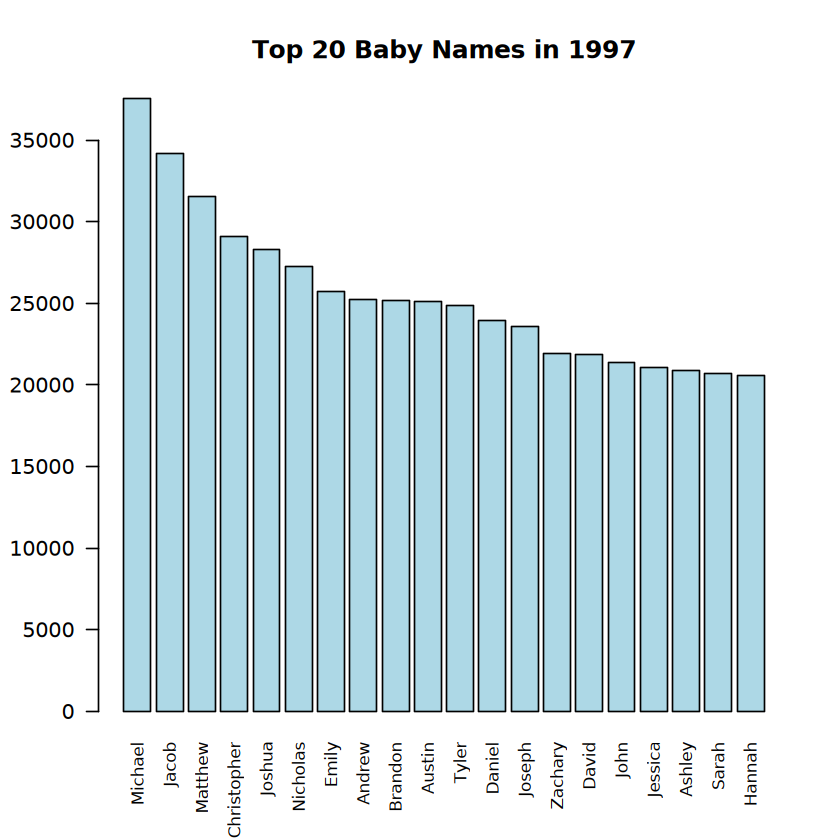

In [70]:
barplot(top20_1997$Counts,
        names.arg = top20_1997$Name,
        main = "Top 20 Baby Names in 1997",
        las = 2,
        col = "lightblue",
        cex.names = 0.8)

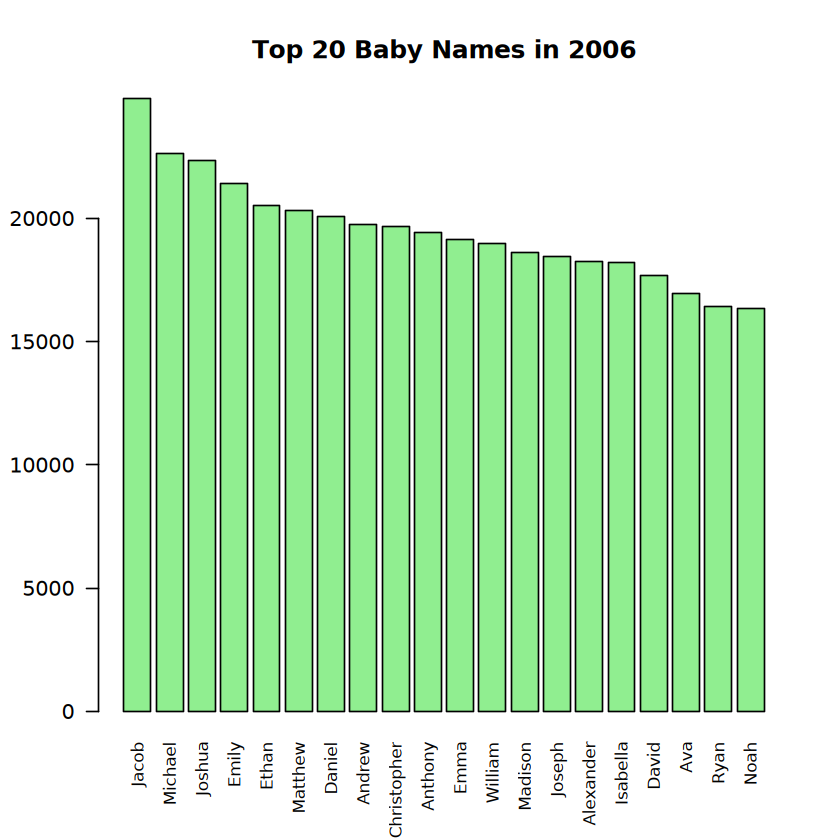

In [75]:
barplot(top20_2006$Counts,
        names.arg = top20_2006$Name,
        main = "Top 20 Baby Names in 2006",
        las = 2,
        col = "lightgreen",
        cex.names = 0.8)

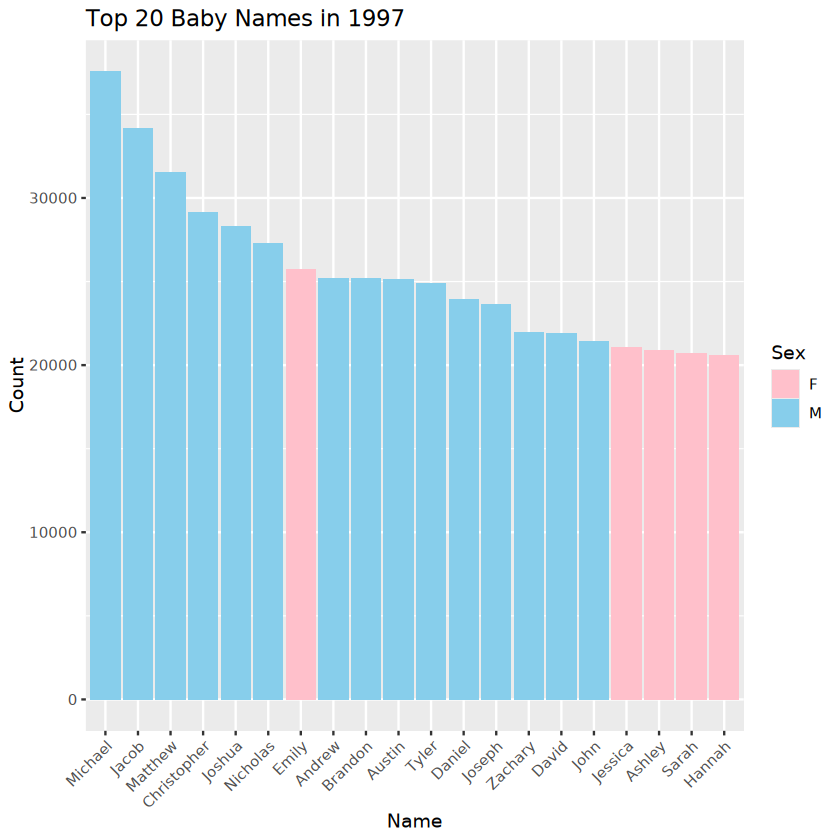

In [80]:
ggplot(top20_1997, aes(x = reorder(Name, -Counts), y = Counts, fill = Sex)) +
  geom_bar(stat = "identity") +
  labs(title = "Top 20 Baby Names in 1997",
       x = "Name",
       y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = c("pink", "skyblue"))

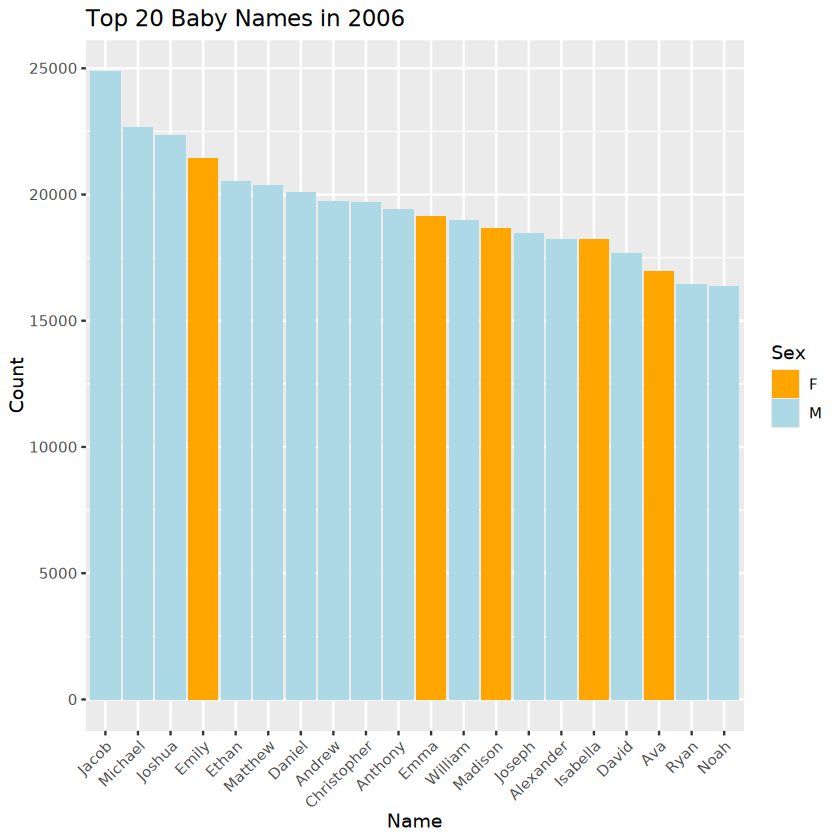

In [84]:
ggplot(top20_2006, aes(x = reorder(Name, -Counts), y = Counts, fill = Sex)) +
  geom_bar(stat = "identity") +
  labs(title = "Top 20 Baby Names in 2006",
       x = "Name",
       y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = c("orange", "lightblue"))

In [88]:
bind_rows(
  top20_1997 %>% mutate(Year = 1997),
  top20_2006 %>% mutate(Year = 2006)
) %>%
  group_by(Year) %>%
  summarise(Total_Entries = n(), Total_Counts = sum(Counts))

Year,Total_Entries,Total_Counts
<dbl>,<int>,<int>
1997,20,510040
2006,20,390075


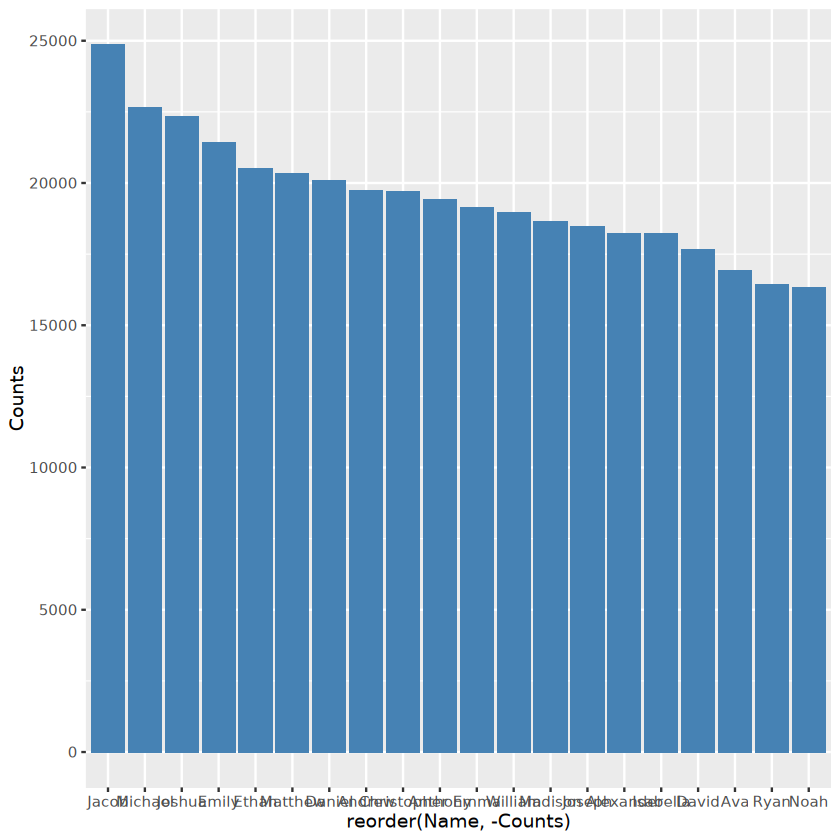

In [96]:
ggplot(top20_2006, aes(x = reorder(Name, -Counts), y = Counts)) +
  geom_bar(stat = "identity", fill = "steelblue")

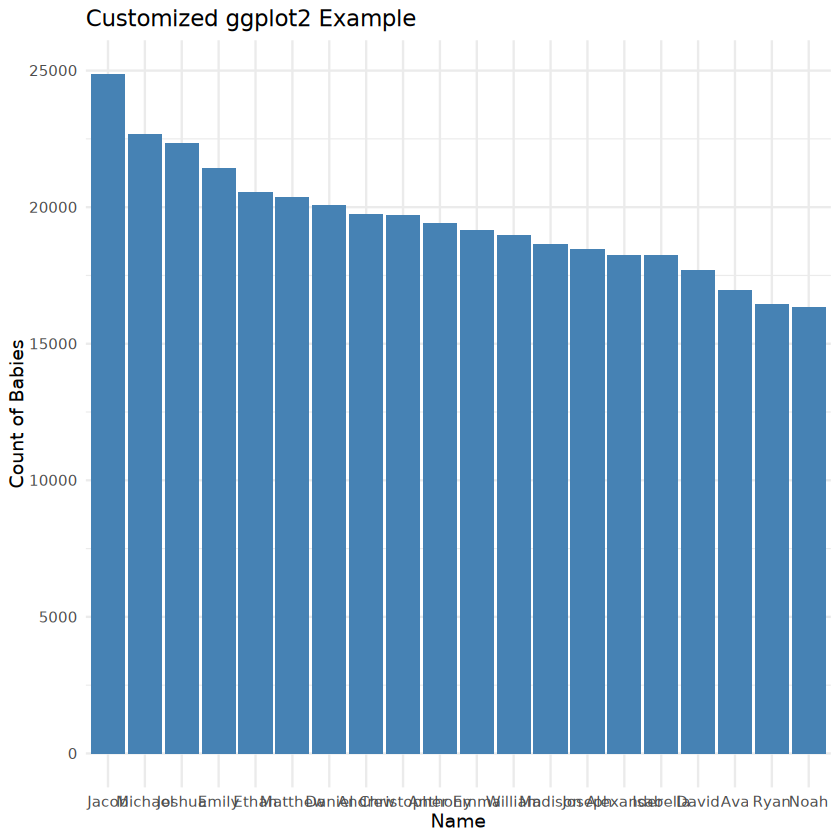

In [102]:
ggplot(top20_2006, aes(x = reorder(Name, -Counts), y = Counts)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Customized ggplot2 Example",
       x = "Name",
       y = "Count of Babies") +
  theme_minimal()

In [112]:
head(top20_2006)

,Name,Sex,Counts
,<chr>,<chr>,<int>
1,Jacob,M,24867
2,Michael,M,22651
3,Joshua,M,22334
4,Emily,F,21411
5,Ethan,M,20522
6,Matthew,M,20339


What the data revealed was a significant trend between 1997 and 2006 - that is, "Avery" became much more popular, especially among girls, while "Alan" and "Eric" steadily declined. This is a reflection of shifting cultural trends in the names of choice during this decade. The frequent use of head() was very useful to check at each transformation (filtering, renaming, combining) data before plotting.Base R barplots provided a basic snapshot, but the ggplot2 version provided more clear labeling, color differentiation based on gender, and better customization options, including rotated labels and defined fills. The take-home message from this question is learning the structure of ggplot2: ggplot() First, you call ggplot(). aes() Next, you use aes() to add data. geom_*, labels, themes Next, you use geom_(), labels, and themes to construct the plot. It's modular, readable, visually and cleanly inclusive of the right insights.

## Question 2

In [114]:
names_2006 <- read.table("/anvil/projects/tdm/data/ssa/yob2006.txt", sep = ",", header = FALSE)
colnames(names_2006) <- c("Name", "Sex", "Counts")

In [118]:
head(names_2006)

,Name,Sex,Counts
,<chr>,<chr>,<int>
1,Emily,F,21411
2,Emma,F,19128
3,Madison,F,18635
4,Isabella,F,18231
5,Ava,F,16941
6,Abigail,F,15633


In [126]:
names_2006_letters <- names_2006 %>%
  mutate(first_letter = substr(Name, 1, 1))

In [134]:
head(names_2006_letters)

,Name,Sex,Counts,first_letter
,<chr>,<chr>,<int>,<chr>
1,Emily,F,21411,E
2,Emma,F,19128,E
3,Madison,F,18635,M
4,Isabella,F,18231,I
5,Ava,F,16941,A
6,Abigail,F,15633,A


In [142]:
df_grouped <- names_2006_letters %>%
  group_by(first_letter) %>%
  summarise(total_count = sum(Counts))

In [151]:
head(df_grouped)

first_letter,total_count
<chr>,<int>
A,548710
B,174687
C,286526
D,208703
E,222850
F,33023


In [157]:
dim(df_grouped)
str(df_grouped)

[1] 26  2

tibble [26 x 2] (S3: tbl_df/tbl/data.frame)
 $ first_letter: chr [1:26] "A" "B" "C" "D" ...
 $ total_count : int [1:26] 548710 174687 286526 208703 222850 33023 115702 94301 85057 479380 ...


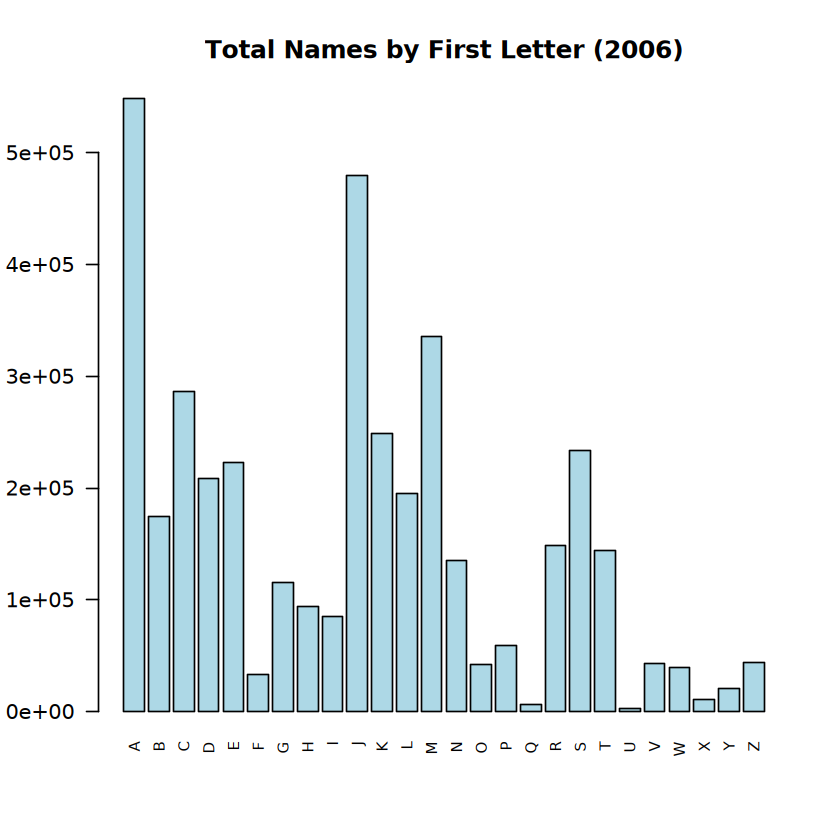

In [161]:
barplot(df_grouped$total_count,
        names.arg = df_grouped$first_letter,
        main = "Total Names by First Letter (2006)",
        col = "lightblue",
        las = 2,
        cex.names = 0.7)

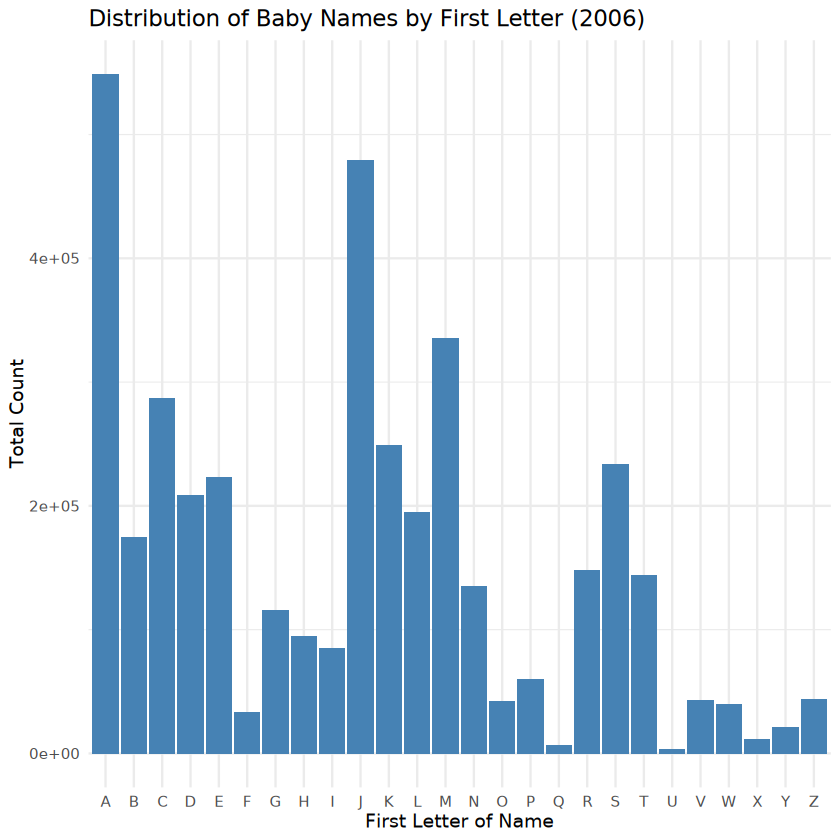

In [167]:
ggplot(df_grouped, aes(x = first_letter, y = total_count)) +
  geom_col(fill = "steelblue") +
  labs(title = "Distribution of Baby Names by First Letter (2006)",
       x = "First Letter of Name",
       y = "Total Count") +
  theme_minimal()

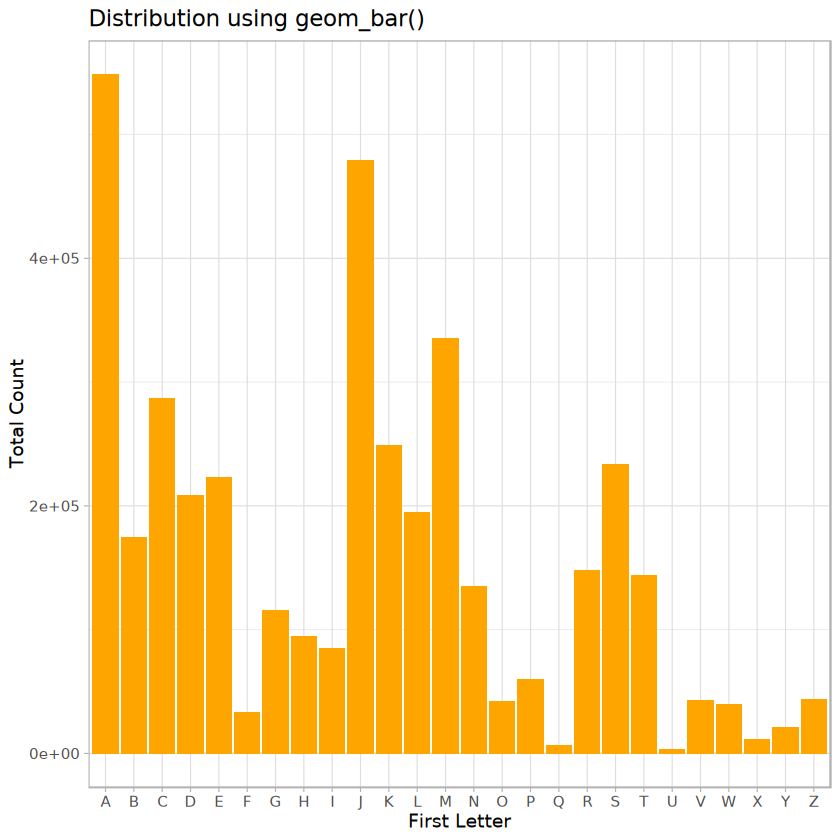

In [174]:
ggplot(df_grouped, aes(x = first_letter, y = total_count)) +
  geom_bar(stat = "identity", fill = "orange") +
  labs(title = "Distribution using geom_bar()",
       x = "First Letter",
       y = "Total Count") +
  theme_light()

In [183]:
df_grouped %>% arrange(desc(total_count)) %>% head(5)

first_letter,total_count
<chr>,<int>
A,548710
J,479380
M,335390
C,286526
K,248548


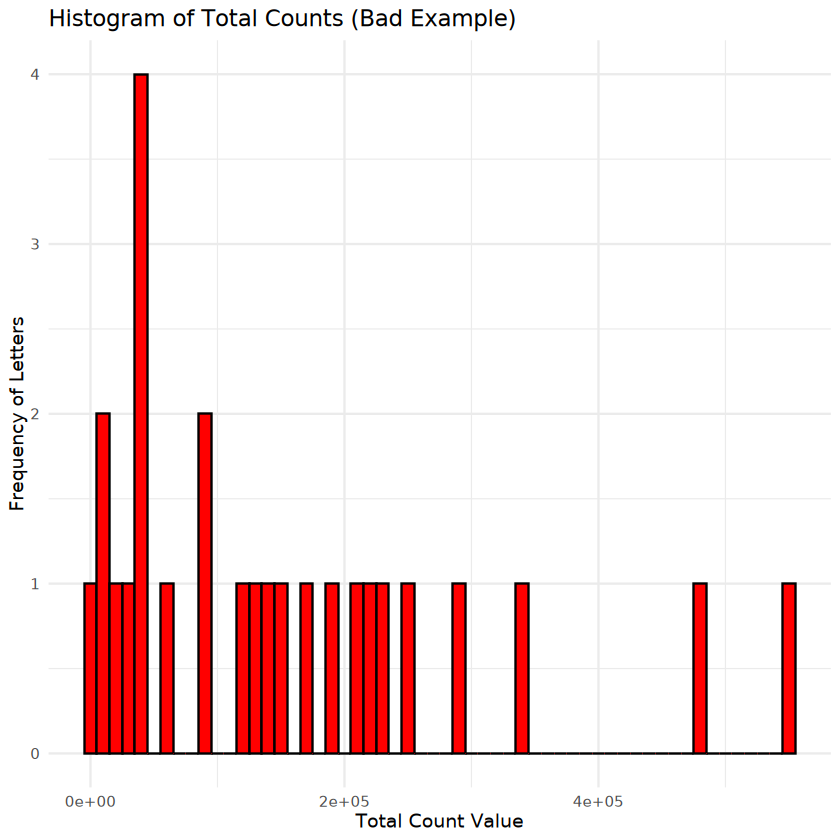

In [187]:
ggplot(df_grouped, aes(x = total_count)) +
  geom_histogram(binwidth = 10000, fill = "red", color = "black") +
  labs(title = "Histogram of Total Counts (Bad Example)",
       x = "Total Count Value",
       y = "Frequency of Letters") +
  theme_minimal()

In [189]:
head(df_grouped)

first_letter,total_count
<chr>,<int>
A,548710
B,174687
C,286526
D,208703
E,222850
F,33023


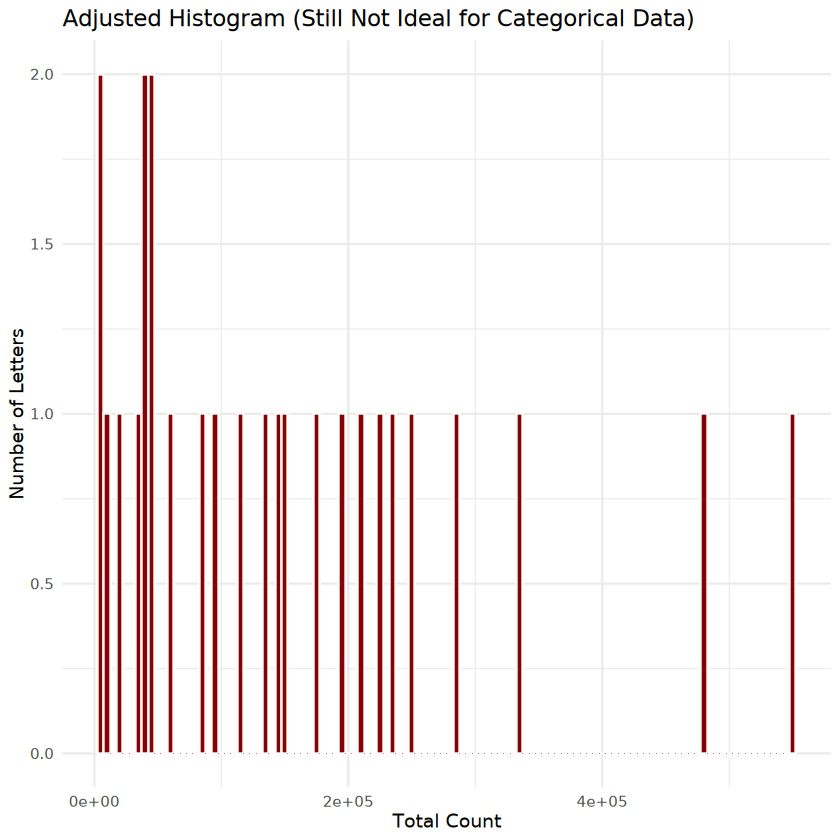

In [194]:
ggplot(df_grouped, aes(x = total_count)) +
  geom_histogram(binwidth = 5000, fill = "darkred", color = "white") +
  labs(title = "Adjusted Histogram (Still Not Ideal for Categorical Data)",
       x = "Total Count",
       y = "Number of Letters") +
  theme_minimal()

In this question, I created a new column named firstletter that represent the first character of the baby name in 2006 data. After some grouping and summarizing with dplyr, this was the dataframe I came up with which showed how often each letter was used as a first letter of a name. Letters such as A and E were at the top of the amounts, not so much different letters such as Q or X.When comparing geomcol() and geombar() I used geomcol() since my data was already aggregated -- my data total counts of each letter was already calculated. If geom_bar() had been used, then the frequencies would have been double counted. The histogram, even though it is a technically possible form of display, was not a good choice from the outset because it represents discrete letter characters as continuous numeric bins, which doesn't make sense for categorical data. This exercise reinforced the idea that the choice of visualization needs to be matched to the type of data -- barplots for categorical summaries, histograms for numerical distributions.

## Question 3

In [225]:
library(dplyr)
library(ggplot2)

In [200]:
names_2006 <- read.table("/anvil/projects/tdm/data/ssa/yob2006.txt", sep = ",", header = FALSE)
colnames(names_2006) <- c("Name", "Sex", "Counts")

In [206]:
head(names_2006)

,Name,Sex,Counts
,<chr>,<chr>,<int>
1,Emily,F,21411
2,Emma,F,19128
3,Madison,F,18635
4,Isabella,F,18231
5,Ava,F,16941
6,Abigail,F,15633


In [229]:
names_2006_letters <- names_2006 %>%
  mutate(first_letter = substr(Name, 1, 1))

In [235]:
head(names_2006_letters)

,Name,Sex,Counts,first_letter
,<chr>,<chr>,<int>,<chr>
1,Emily,F,21411,E
2,Emma,F,19128,E
3,Madison,F,18635,M
4,Isabella,F,18231,I
5,Ava,F,16941,A
6,Abigail,F,15633,A


In [241]:
df_grouped_again <- names_2006_letters %>%
  group_by(first_letter, Sex) %>%
  summarise(total_count = sum(Counts), .groups = "drop")

In [249]:
head(df_grouped_again)

first_letter,Sex,total_count
<chr>,<chr>,<int>
A,F,323402
A,M,225308
B,F,66220
B,M,108467
C,F,106794
C,M,179732


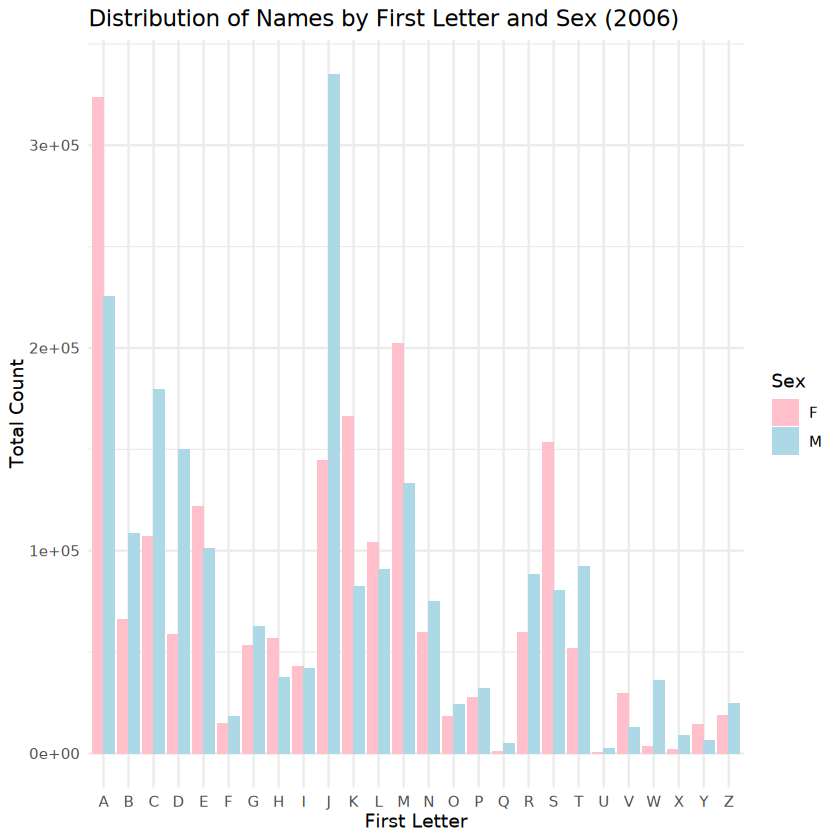

In [255]:
ggplot(df_grouped_again, aes(x = first_letter, y = total_count, fill = Sex)) +
  geom_col(position = "dodge") +
  labs(title = "Distribution of Names by First Letter and Sex (2006)",
       x = "First Letter",
       y = "Total Count") +
  scale_fill_manual(values = c("pink", "lightblue")) +
  theme_minimal()

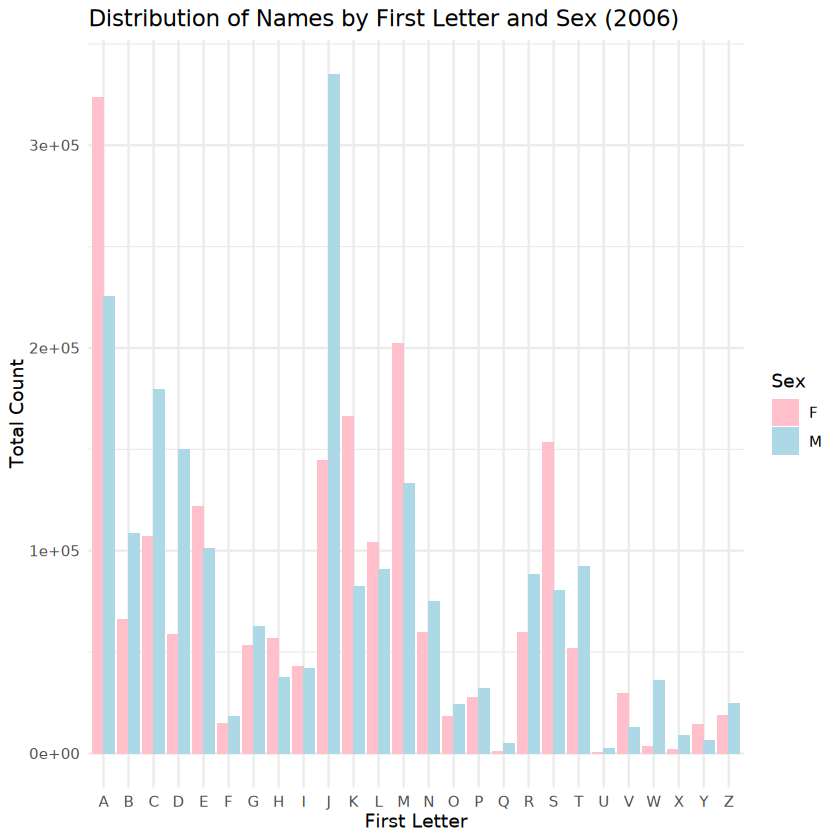

In [259]:
ggplot(df_grouped_again, aes(x = first_letter, y = total_count, fill = Sex)) +
  geom_col(position = "dodge") +
  labs(title = "Distribution of Names by First Letter and Sex (2006)",
       x = "First Letter",
       y = "Total Count") +
  scale_fill_manual(values = c("pink", "lightblue")) +
  theme_minimal()

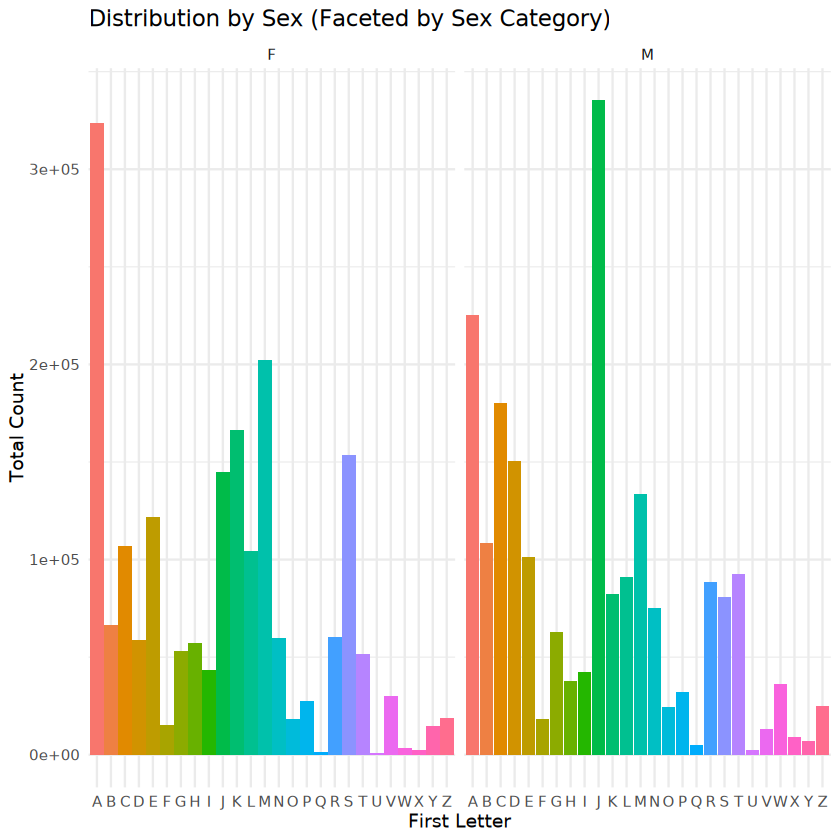

In [265]:
ggplot(df_grouped_again, aes(x = first_letter, y = total_count, fill = first_letter)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~Sex) +
  labs(title = "Distribution by Sex (Faceted by Sex Category)",
       x = "First Letter",
       y = "Total Count") +
  theme_minimal()

In [280]:
df_grouped_again %>% arrange(desc(total_count)) %>% head(10)

first_letter,Sex,total_count
<chr>,<chr>,<int>
J,M,335018
A,F,323402
A,M,225308
M,F,201999
C,M,179732
K,F,166326
S,F,153225
D,M,150083
J,F,144362


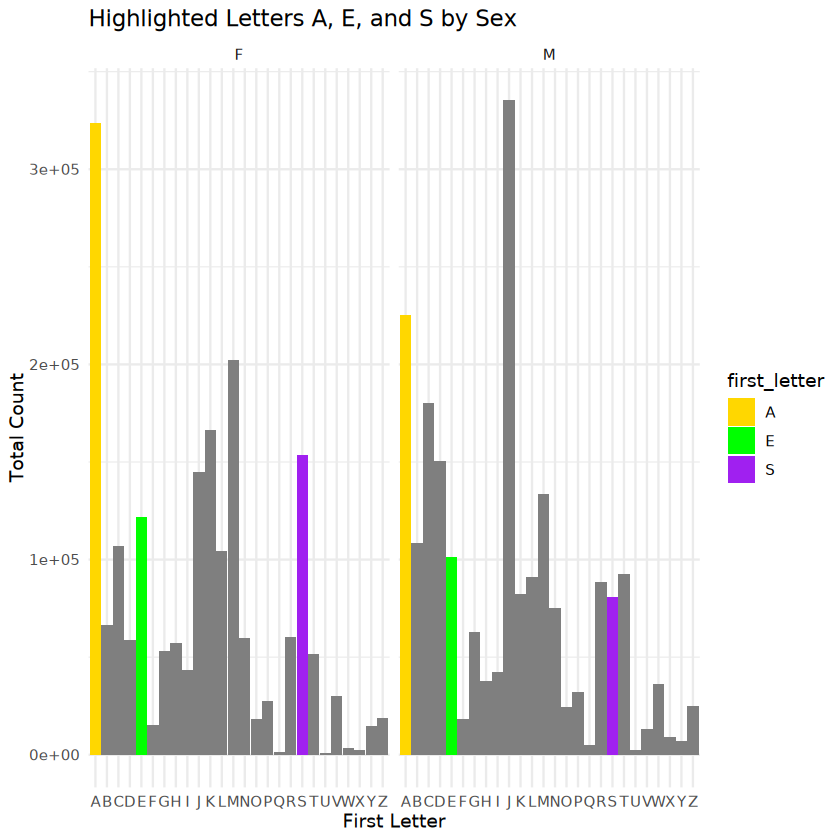

In [288]:
highlight_colors <- c("A" = "gold", "E" = "green", "S" = "purple")
ggplot(df_grouped_again, aes(x = first_letter, y = total_count, fill = first_letter)) +
  geom_col() +
  facet_wrap(~Sex) +
  scale_fill_manual(values = c(highlight_colors, rep("gray", 23))) +
  labs(title = "Highlighted Letters A, E, and S by Sex",
       x = "First Letter",
       y = "Total Count") +
  theme_minimal()

In [299]:
df_grouped_again %>% filter(first_letter %in% c("A", "E", "S"))

first_letter,Sex,total_count
<chr>,<chr>,<int>
A,F,323402
A,M,225308
E,F,121623
E,M,101227
S,F,153225
S,M,80603


In this section, I put the data of baby names in 2006 based on the first letter and sex in order to observe the patterns of naming between males and females. As the barplot showed, there were letters which were predominant in both male and female names, namely A, E, and S because they were popular across cultures. The gender distribution in each letter was compared easily by using color coding (fill = Sex). The facetwrap() function generated distinct subplot which either divides the data by letter or by sex which allows us to view smaller details which would otherwise be obscured by a large plot. Lastly, it was scalefill_manual() that enabled customization of colors manually- Iused colors A, E and S to explicitly indicate the frequency values in the letters. This question shows that ggplot2 layering and faceting can help reveal patterns that would not be as pronounced in one combined chart.

## Question 4

In [308]:
zillow <- read.csv("/anvil/projects/tdm/data/zillow/State_time_series.csv")

In [316]:
head(zillow)

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,1996-04-30,Alabama,NA,NA,NA,NA,NA,NA,NA,NA,...,45600,99500,79500,79000,140200,NA,NA,NA,NA,NA
2,1996-04-30,Arizona,NA,NA,NA,NA,NA,NA,NA,NA,...,67100,78900,103600,107500,168700,NA,NA,NA,NA,NA
3,1996-04-30,Arkansas,NA,NA,NA,NA,NA,NA,NA,NA,...,38400,70300,64400,64500,115200,NA,NA,NA,NA,NA
4,1996-04-30,California,NA,NA,NA,NA,NA,NA,NA,NA,...,95100,136100,157900,162000,270600,NA,NA,NA,NA,NA
5,1996-04-30,Colorado,NA,NA,NA,NA,NA,NA,NA,NA,...,82700,99400,128100,133600,209300,NA,NA,NA,NA,NA
6,1996-04-30,Connecticut,NA,NA,NA,NA,NA,NA,NA,NA,...,83700,85000,132000,141000,231600,NA,NA,NA,NA,NA


In [321]:
colSums(is.na(zillow[, c("DaysOnZillow_AllHomes", "MedianListingPrice_AllHomes")]))

DaysOnZillow_AllHomes MedianListingPrice_AllHomes 
                       8367                        8966

In [327]:
zillow_cleaned <- zillow %>%
  filter(!is.na(DaysOnZillow_AllHomes),
         !is.na(MedianListingPrice_AllHomes))

In [336]:
head(zillow_cleaned)

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,2010-01-31,Alabama,169.0,32616,29765,NA,98.49197,93.09783,103.93570,110.90909,...,67900,137300,123800,123300,232500,NA,NA,NA,NA,NA
2,2010-01-31,Alaska,130.0,3477,2748,182.0312,163.35188,154.22483,144.43942,125.41806,...,177200,176100,247200,257100,356200,NA,NA,NA,NA,NA
3,2010-01-31,Arkansas,121.0,18475,17418,NA,81.40726,86.21399,94.74342,96.91539,...,59200,127500,105800,105800,185100,NA,NA,NA,NA,NA
4,2010-01-31,Colorado,142.0,46680,41554,209.7378,157.98713,145.83333,153.84615,173.55633,...,130000,155700,215600,225100,388300,NA,NA,NA,NA,NA
5,2010-01-31,Delaware,137.5,6753,6215,NA,138.88889,133.28571,130.62500,149.46455,...,141400,NA,212000,211200,327800,NA,NA,NA,NA,NA
6,2010-01-31,DistrictofColumbia,126.0,2128,1934,424.3814,NA,NA,NA,NA,...,219400,351500,354600,366400,707500,NA,NA,NA,NA,NA


In [344]:
colSums(is.na(zillow_cleaned[, c("DaysOnZillow_AllHomes", "MedianListingPrice_AllHomes")]))

DaysOnZillow_AllHomes MedianListingPrice_AllHomes 
                          0                           0

4.1: In cases of NA values in the column being mapped to color or axes, ggplot2 does not really know what to do with them in terms of position or color hence it puts them as gray points or even not at all. Filtering eliminates those rows which do not exist so all the plotted points will now have valid numeric data.

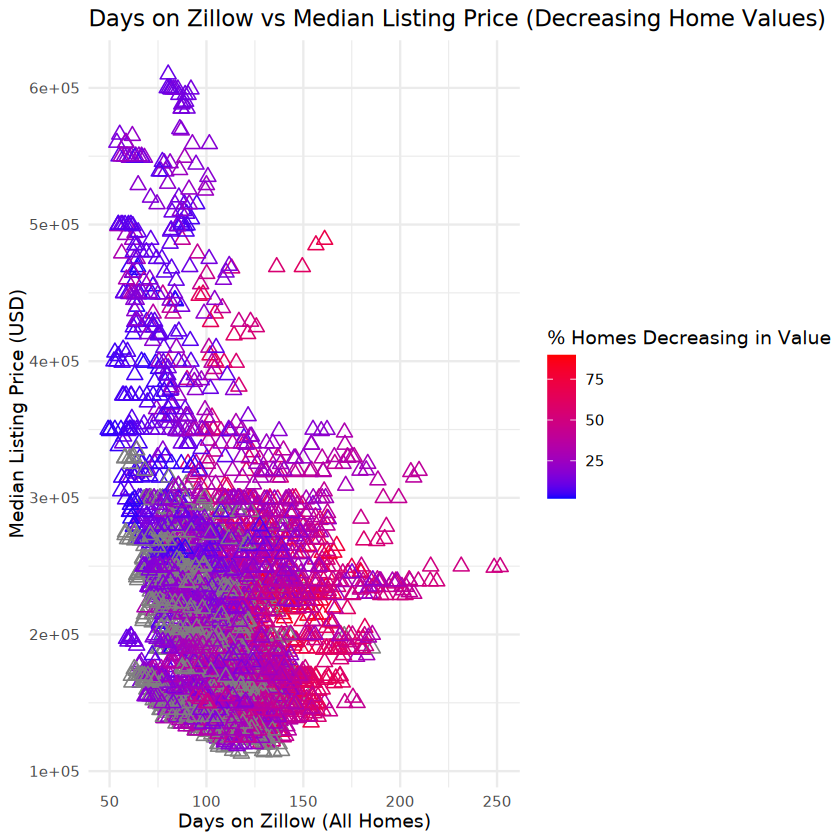

In [350]:
p1 <- ggplot(zillow_cleaned,
             aes(x = DaysOnZillow_AllHomes,
                 y = MedianListingPrice_AllHomes,
                 color = PctOfHomesDecreasingInValues_AllHomes)) +
  geom_point(size = 3, shape = 2) +
  scale_color_gradient(low = "blue", high = "red") +
  labs(title = "Days on Zillow vs Median Listing Price (Decreasing Home Values)",
       x = "Days on Zillow (All Homes)",
       y = "Median Listing Price (USD)",
       color = "% Homes Decreasing in Value") +
  theme_minimal()
p1

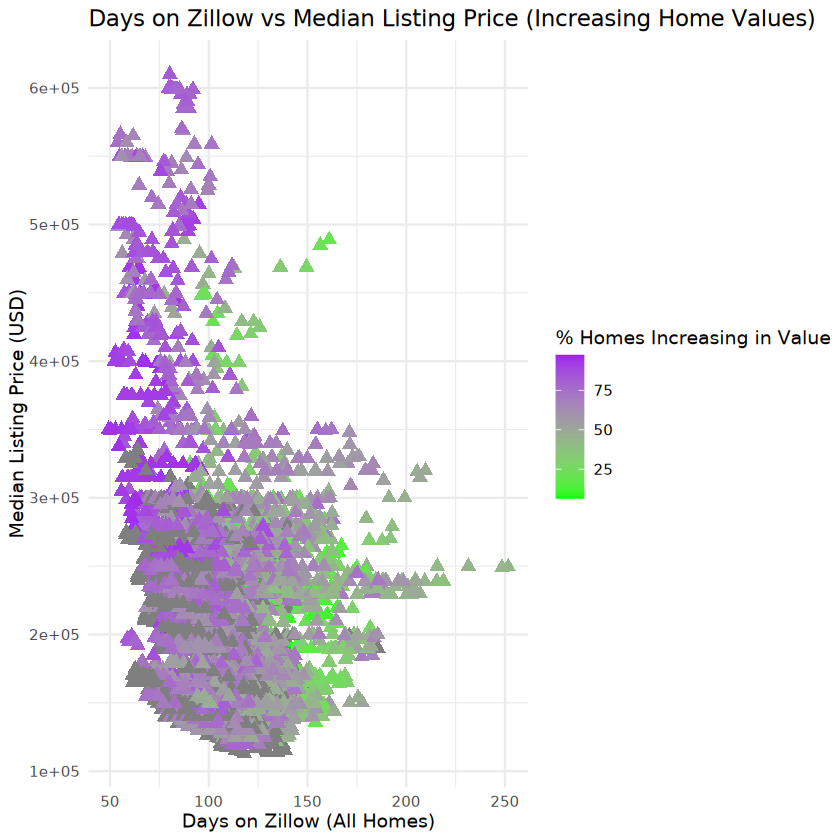

In [357]:
p2 <- ggplot(zillow_cleaned,
             aes(x = DaysOnZillow_AllHomes,
                 y = MedianListingPrice_AllHomes,
                 color = PctOfHomesIncreasingInValues_AllHomes)) +
  geom_point(size = 3, shape = 17) +
  scale_color_gradient(low = "green", high = "purple") +
  labs(title = "Days on Zillow vs Median Listing Price (Increasing Home Values)",
       x = "Days on Zillow (All Homes)",
       y = "Median Listing Price (USD)",
       color = "% Homes Increasing in Value") +
  theme_minimal()

p2

In [361]:
p1 <- p1 + geom_smooth(method = "lm", se = FALSE, color = "black")
p2 <- p2 + geom_smooth(method = "lm", se = FALSE, color = "black")

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


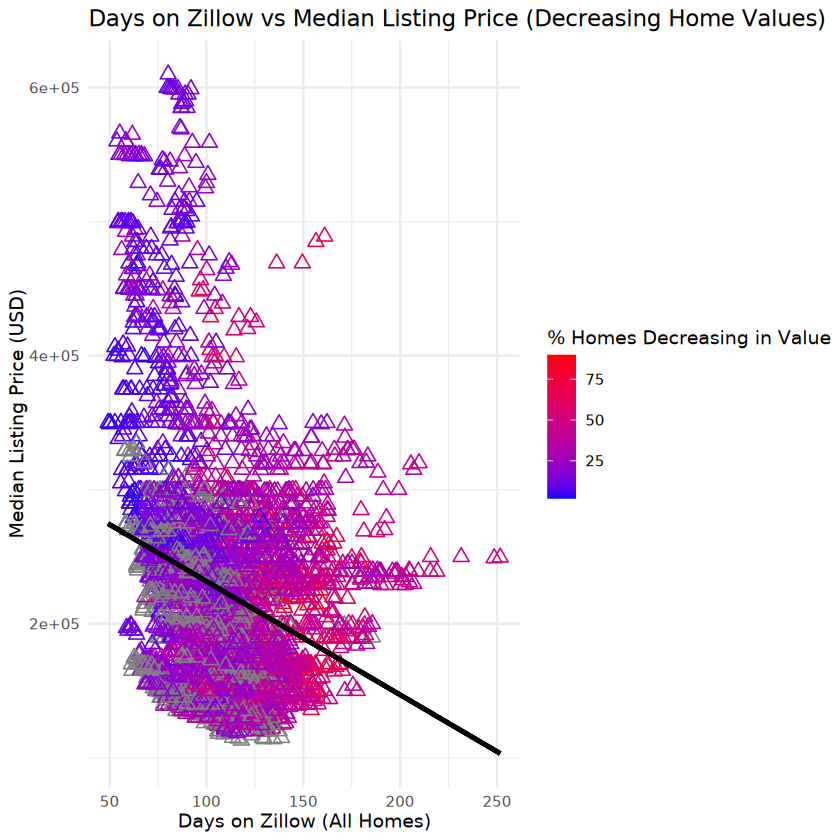

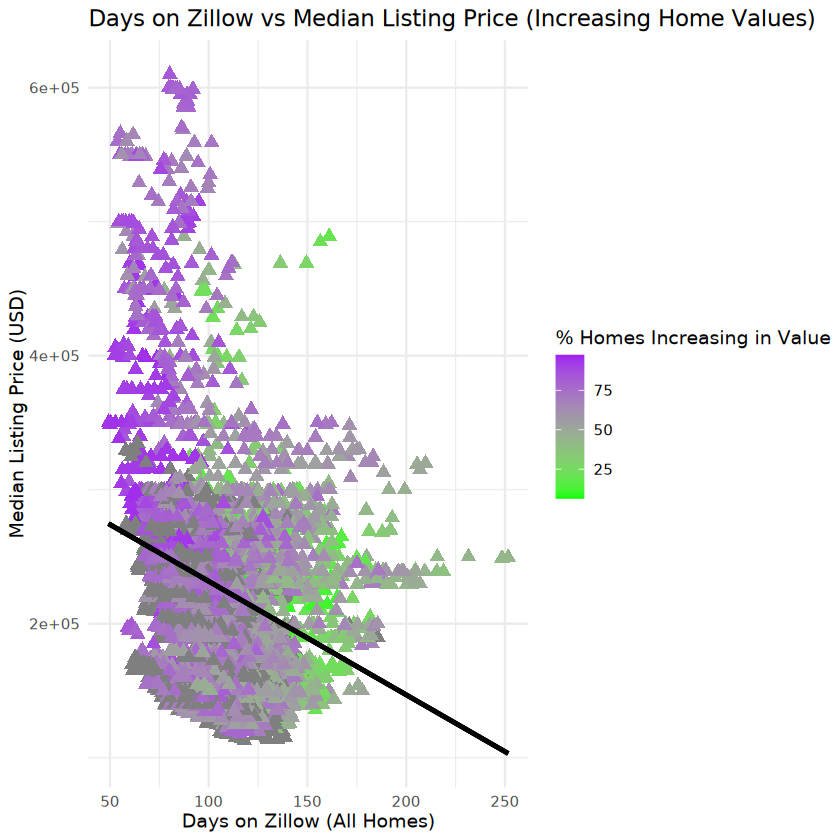

In [364]:
p1
p2

In [370]:
summary(zillow_cleaned$DaysOnZillow_AllHomes)
summary(zillow_cleaned$MedianListingPrice_AllHomes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  49.25   88.75  108.00  109.09  126.50  251.62 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 112944  159900  210000  223952  259900  610000 

In [375]:
zillow_cleaned %>%
  arrange(desc(DaysOnZillow_AllHomes)) %>%
  head(5)

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,2010-03-31,Vermont,251.625,5104,4518,145.0000,149.7845,133.8839,132.2506,120.1918,...,NA,173900,199300,200800,297500,NA,NA,NA,NA,NA
2,2010-04-30,Vermont,248.500,5145,4723,145.4522,149.5726,134.9628,131.5708,120.6162,...,NA,173800,199200,200600,296600,NA,NA,NA,NA,NA
3,2010-02-28,Vermont,231.500,4941,4206,142.1457,149.8750,134.0545,133.3403,120.7928,...,NA,173000,198600,199700,296800,NA,NA,NA,NA,NA
4,2012-02-29,Vermont,218.875,7625,6894,141.6350,145.2727,142.5632,138.7655,124.9436,...,NA,167300,204000,205900,297400,1316,1313,0.89,1306,1317
5,2010-05-31,Vermont,215.750,5015,4780,143.5728,150.9381,136.4706,133.3333,123.2662,...,NA,172600,199000,200300,296500,NA,NA,NA,NA,NA


4.3 The scatterplot demonstrates that there is a weak negative correlation between the days that a home has been listed on Zillow and its median listing price - properties that are still being listed on the site are less expensive. A small number of outliers have very high listing prices and length of stay which can be taken to be luxury or overvalued properties. This downtrend is corroborated by the trendline indicating that the longer the home remains in the market, the lower the prices of the homes become, which could be attributed to the slowing demand or lowering of prices with time.

Having cleaned the dataset, I found that some of the important columns, such as DaysOnZillowAllHomes and MedianListingPriceAllHomes, had a number of missing values. In cases where these missing values were not eliminated, ggplot would provide gray points, as it could not give them their correct colors and coordinates. This was corrected by filtering using!is.na() which produced clean and fully colored plots. The scatterplots indicated that there is a poor negative correlation between home longevity on Zillow and median listing prices - the longer the home is on Zillow, the lower the price. The color gradients also proved useful in that the more homes were devaluing (red) they were likely to overlap with the lower price range and the more the homes were gaining value (green/purple) they were likely to be priced higher. These patterns were accentuated by the trendlines (geom smooth(method=lm)) and it is evident that though not absolutely linear, there is an overall trend in which the period in the market has a negative correlation with price competitiveness.

## Question 5

In [380]:
zillow <- read.csv("/anvil/projects/tdm/data/zillow/State_time_series.csv")

In [385]:
head(zillow)

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,1996-04-30,Alabama,NA,NA,NA,NA,NA,NA,NA,NA,...,45600,99500,79500,79000,140200,NA,NA,NA,NA,NA
2,1996-04-30,Arizona,NA,NA,NA,NA,NA,NA,NA,NA,...,67100,78900,103600,107500,168700,NA,NA,NA,NA,NA
3,1996-04-30,Arkansas,NA,NA,NA,NA,NA,NA,NA,NA,...,38400,70300,64400,64500,115200,NA,NA,NA,NA,NA
4,1996-04-30,California,NA,NA,NA,NA,NA,NA,NA,NA,...,95100,136100,157900,162000,270600,NA,NA,NA,NA,NA
5,1996-04-30,Colorado,NA,NA,NA,NA,NA,NA,NA,NA,...,82700,99400,128100,133600,209300,NA,NA,NA,NA,NA
6,1996-04-30,Connecticut,NA,NA,NA,NA,NA,NA,NA,NA,...,83700,85000,132000,141000,231600,NA,NA,NA,NA,NA


In [390]:
colSums(is.na(zillow[, c("Date", "MedianListingPrice_AllHomes", "RegionName")]))

Date MedianListingPrice_AllHomes 
                          0                        8966 
                 RegionName 
                          0

In [395]:
zillow_cleaned <- zillow %>%
  filter(!is.na(Date),
         !is.na(MedianListingPrice_AllHomes),
         !is.na(RegionName))

In [400]:
head(zillow_cleaned)

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,2010-01-31,Alabama,169.0,32616,29765,NA,98.49197,93.09783,103.93570,110.90909,...,67900,137300,123800,123300,232500,NA,NA,NA,NA,NA
2,2010-01-31,Alaska,130.0,3477,2748,182.0312,163.35188,154.22483,144.43942,125.41806,...,177200,176100,247200,257100,356200,NA,NA,NA,NA,NA
3,2010-01-31,Arkansas,121.0,18475,17418,NA,81.40726,86.21399,94.74342,96.91539,...,59200,127500,105800,105800,185100,NA,NA,NA,NA,NA
4,2010-01-31,Colorado,142.0,46680,41554,209.7378,157.98713,145.83333,153.84615,173.55633,...,130000,155700,215600,225100,388300,NA,NA,NA,NA,NA
5,2010-01-31,Delaware,137.5,6753,6215,NA,138.88889,133.28571,130.62500,149.46455,...,141400,NA,212000,211200,327800,NA,NA,NA,NA,NA
6,2010-01-31,DistrictofColumbia,126.0,2128,1934,424.3814,NA,NA,NA,NA,...,219400,351500,354600,366400,707500,NA,NA,NA,NA,NA


In [406]:
zillow_cleaned$Date <- as.Date(zillow_cleaned$Date)
str(zillow_cleaned$Date)

 Date[1:4246], format: "2010-01-31" "2010-01-31" "2010-01-31" "2010-01-31" "2010-01-31" ...


In [411]:
dim(zillow_cleaned)

[1] 4246   82

5.1: I eliminated the NA rows in Date, MedianListingPrice_AllHomes and RegionName to avoid gaps or NA points in time series. A proper conversion of Date to the appropriate date format can be followed by plotting of time correctly.

In [416]:
selected_regions <- c("Indiana", "Tennessee", "Utah", "NewHampshire")

In [422]:
zillow_grouped_small <- zillow_cleaned %>%
  filter(RegionName %in% selected_regions) %>%
  group_by(Date, RegionName) %>%
  summarise(avg_price = mean(MedianListingPrice_AllHomes),
            .groups = "drop")

In [428]:
head(zillow_grouped_small)

Date,RegionName,avg_price
<date>,<chr>,<dbl>
2010-01-31,Indiana,124900
2010-01-31,NewHampshire,249000
2010-01-31,Tennessee,159800
2010-02-28,Indiana,125000
2010-02-28,NewHampshire,239999
2010-02-28,Tennessee,159000


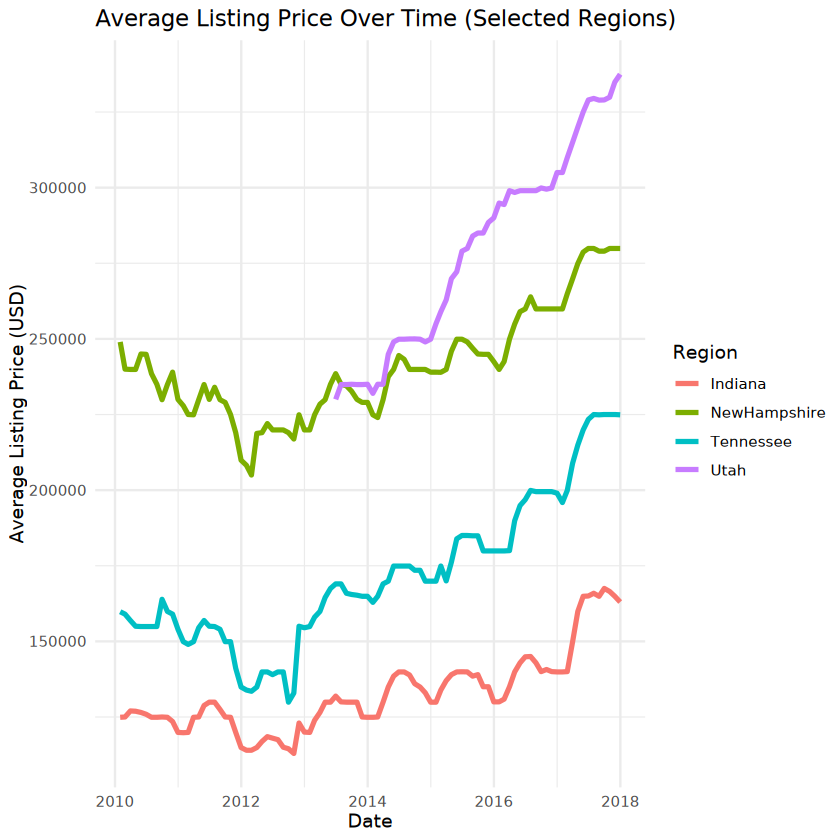

In [433]:
p <- ggplot(zillow_grouped_small,
            aes(x = Date, y = avg_price,
                color = RegionName,
                group = RegionName)) +
  geom_line(linewidth = 1.1) +
  labs(title = "Average Listing Price Over Time (Selected Regions)",
       x = "Date",
       y = "Average Listing Price (USD)",
       color = "Region") +
  theme_minimal()

p

In [437]:
more_selected_regions <- c("California", "Delaware", "Florida", "Alaska")

zillow_grouped_extra <- zillow_cleaned %>%
  filter(RegionName %in% more_selected_regions) %>%
  group_by(Date, RegionName) %>%
  summarise(avg_price = mean(MedianListingPrice_AllHomes),
            .groups = "drop")

In [440]:
head(zillow_grouped_extra)

Date,RegionName,avg_price
<date>,<chr>,<dbl>
2010-01-31,Alaska,239900
2010-01-31,Delaware,234900
2010-02-28,Alaska,241250
2010-02-28,Delaware,232900
2010-03-31,Alaska,248000
2010-03-31,Delaware,230000


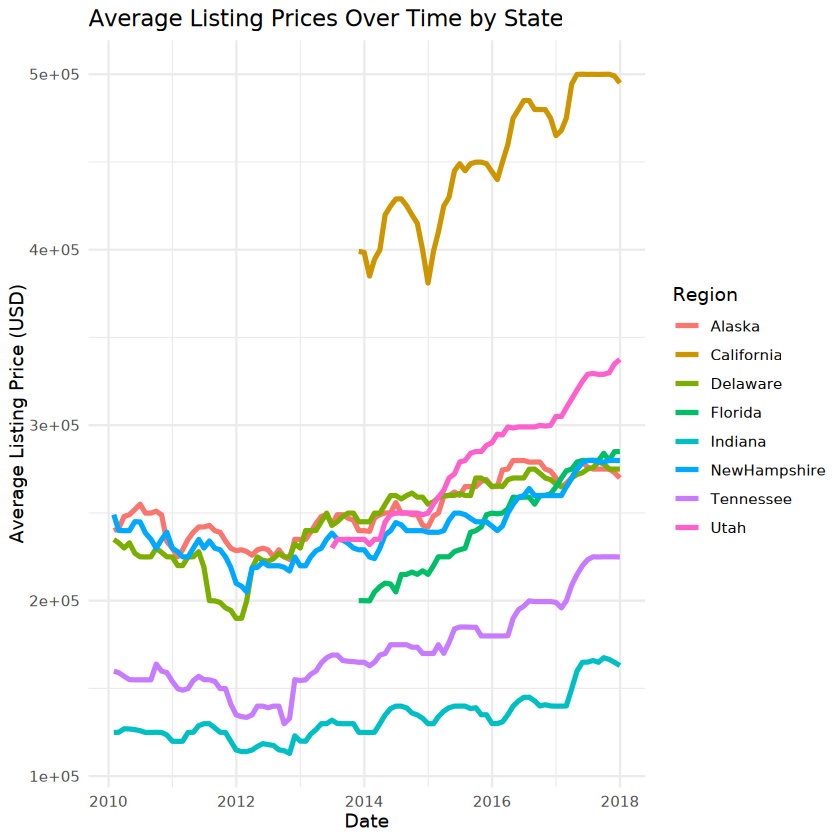

In [445]:
combined_grouped <- rbind(zillow_grouped_small, zillow_grouped_extra)

ggplot(combined_grouped,
       aes(x = Date, y = avg_price, color = RegionName, group = RegionName)) +
  geom_line(linewidth = 1.1) +
  labs(title = "Average Listing Prices Over Time by State",
       x = "Date",
       y = "Average Listing Price (USD)",
       color = "Region") +
  theme_minimal()

In [461]:
combined_grouped %>%
  group_by(RegionName) %>%
  summarise(avg_price_overall = mean(avg_price)) %>%
  arrange(desc(avg_price_overall))

RegionName,avg_price_overall
<chr>,<dbl>
California,451017.5
Utah,279548.1
Alaska,251485.2
Delaware,245549.1
Florida,243434.2
NewHampshire,240835.0
Tennessee,171541.4
Indiana,132788.5


Based on the line plot, California and Florida are always above average listing prices compared to other states such as Indiana and Utah. In all the regions, the trend is evidently on the upward direction indicating that the value of houses has been on the general upward trend. Smaller states like New Hampshire and Delaware have spikes here and there, which are probably caused by limited data or short-term market changes.

I cleaned the data and removed the blank lines after which I aggregated the data using the Date and RegionName and averaged the listing prices in order to show trends across the states. The Date column was converted to proper date format in order to make it easy to view. The line plot that was generated showed the California and Florida were significantly higher in home price as compared to Indiana, Utah or Tennessee with a high regional market disparity. All regions show an incremental change in the positive direction in the long-run, which implies that the home values will increase in the country. There are minor spikes by the smaller states like Delaware and New Hampshire which are likely to be less stable or smaller housing markets. Overall, the trendlines suggest that there are long-term stable rate growths in houses with the larger states showing higher prices and volatilities.

In [457]:
## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.

https://www.purdue.edu/odos/osrr/honor-pledge/


ERROR: Error in parse(text = input): <text>:3:4: unexpected symbol
2: 
3: By submitting
      ^
